In [1]:
!pip install bs4
!pip install numpy
!pip install geocoder
from sklearn.cluster import KMeans
import numpy as np
import geocoder 
from bs4 import BeautifulSoup
import requests
import pandas as pd

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=3125ef4d21b52f6fb15ca5379cc43168c08f14cccaeaec8e85161995ee8386ed
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 98 kB 6.8 MB/s  eta 0:00:01


In [2]:
url1 = "https://en.wikipedia.org/wiki/WC_postcode_area"
html_data1  = requests.get(url1).text 
beautiful_soup1 = BeautifulSoup(html_data1,"html5lib")
london_table1 = beautiful_soup1.find_all('table') 
london_table1[1]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 
<tr>
<th>WC1A
</th>
<td>LONDON
</td>
<td><a class="mw-redirect" href="/wiki/New_Oxford_Street" title="New Oxford Street">New Oxford Street</a>
</td>
<td><a href="/wiki/London_Borough_of_Camden" title="London Borough of Camden">Camden</a>
</td></tr>
<tr>
<th>WC1B
</th>
<td>LONDON
</td>
<td><a href="/wiki/Bloomsbury" title="Bloomsbury">Bloomsbury</a>, <a href="/wiki/British_Museum" title="British Museum">British Museum</a>, <a href="/wiki/Southampton_Row" title="Southampton Row">Southampton Row</a>
</td>
<td>Camden
</td></tr>
<tr>
<th>WC1E
</th>
<td>LONDON
</td>
<td><a href="/wiki/University_College_London" title="University College London">University College London</a>, <a class="mw-redirect" href="/wiki/SOAS,_University_of_London" title=

In [3]:
london_district_wc = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table1[1].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_wc = london_district_wc.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_wc

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,WC1A,New Oxford Street,Camden
2,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden
3,WC1E,"University College London, SOAS",Camden
4,WC1H,"St Pancras, UCL Institute of Education",Camden
5,WC1N,"Russell Square, Great Ormond Street",Camden
6,WC1R,Gray's Inn,Camden
7,WC1V,High Holborn,"Camden, City of London"
8,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington"
9,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London"


In [4]:
london_district_wc=london_district_wc.drop(labels=0, axis=0)
london_district_wc=london_district_wc.reset_index()
london_district_wc=london_district_wc.drop(labels='index',axis=1)

In [5]:
london_district_wc

,Postcode district,Coverage,Local Authority Areas
0,WC1A,New Oxford Street,Camden
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden
2,WC1E,"University College London, SOAS",Camden
3,WC1H,"St Pancras, UCL Institute of Education",Camden
4,WC1N,"Russell Square, Great Ormond Street",Camden
5,WC1R,Gray's Inn,Camden
6,WC1V,High Holborn,"Camden, City of London"
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington"
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London"
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster"


In [6]:
url2 = "https://en.wikipedia.org/wiki/EC_postcode_area"
html_data2  = requests.get(url2).text 
beautiful_soup2 = BeautifulSoup(html_data2,"html5lib")
london_table2 = beautiful_soup2.find_all('table') 
london_table2[2]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 
<tr>
<th>EC1A
</th>
<td>LONDON
</td>
<td><a href="/wiki/St_Bartholomew%27s_Hospital" title="St Bartholomew's Hospital">St Bartholomew's Hospital</a>
</td>
<td><a href="/wiki/City_of_London" title="City of London">City of London</a>, <a href="/wiki/London_Borough_of_Islington" title="London Borough of Islington">Islington</a>
</td></tr>
<tr>
<th>EC1M
</th>
<td>LONDON
</td>
<td><a href="/wiki/Clerkenwell" title="Clerkenwell">Clerkenwell</a>, <a href="/wiki/Farringdon,_London" title="Farringdon, London">Farringdon</a>
</td>
<td>Islington, <a href="/wiki/London_Borough_of_Camden" title="London Borough of Camden">Camden</a>, City of London
</td></tr>
<tr>
<th>EC1N
</th>
<td>LONDON
</td>
<td><a href="/wiki/Hatton_Garden" title="Hatton Garden">

In [7]:
london_district_ec = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table2[2].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_ec = london_district_ec.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_ec

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,EC1A,St Bartholomew's Hospital,"City of London, Islington"
2,EC1M,"Clerkenwell, Farringdon","Islington, Camden, City of London"
3,EC1N,Hatton Garden,"Camden, City of London"
4,EC1P,,non-geographic
5,EC1R,"Finsbury, Finsbury Estate (west)","Islington, Camden"
6,EC1V,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"
7,EC1Y,"St Luke's, Bunhill Fields","Islington, City of London"
8,EC2A,Shoreditch,"Islington, Hackney, City of London"
9,EC2M,"Broadgate, Liverpool Street","City of London, Tower Hamlets"


In [8]:
london_district_ec=london_district_ec.drop(labels=0, axis=0)
london_district_ec=london_district_ec.reset_index()
london_district_ec=london_district_ec.drop(labels='index',axis=1)
london_district_ec=london_district_ec.loc[london_district_ec['Local Authority Areas']!='non-geographic']
london_district_ec

,Postcode district,Coverage,Local Authority Areas
0,EC1A,St Bartholomew's Hospital,"City of London, Islington"
1,EC1M,"Clerkenwell, Farringdon","Islington, Camden, City of London"
2,EC1N,Hatton Garden,"Camden, City of London"
4,EC1R,"Finsbury, Finsbury Estate (west)","Islington, Camden"
5,EC1V,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"
6,EC1Y,"St Luke's, Bunhill Fields","Islington, City of London"
7,EC2A,Shoreditch,"Islington, Hackney, City of London"
8,EC2M,"Broadgate, Liverpool Street","City of London, Tower Hamlets"
9,EC2N,"Old Broad Street, Tower 42",City of London
11,EC2R,Bank of England,City of London


In [9]:
url3 = "https://en.wikipedia.org/wiki/N_postcode_area"
html_data3  = requests.get(url3).text 
beautiful_soup3 = BeautifulSoup(html_data3,"html5lib")
london_table3 = beautiful_soup3.find_all('table') 
london_table3[1]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 

<tr>
<th>N1
</th>
<td>LONDON
</td>
<td><i>Northern head district:</i> <a href="/wiki/Barnsbury" title="Barnsbury">Barnsbury</a> (part), <a href="/wiki/Canonbury" title="Canonbury">Canonbury</a>, <a href="/wiki/Kings_Cross,_London" title="Kings Cross, London">Kings Cross</a>, <a href="/wiki/Islington" title="Islington">Islington</a>, <a href="/wiki/Pentonville" title="Pentonville">Pentonville</a>, <a href="/wiki/De_Beauvoir_Town" title="De Beauvoir Town">De Beauvoir Town</a>, <a href="/wiki/Hoxton" title="Hoxton">Hoxton</a>. <a href="/wiki/Shoreditch" title="Shoreditch">Shoreditch</a> (part)
</td>
<td><a href="/wiki/London_Borough_of_Hackney" title="London Borough of Hackney">Hackney</a>, <a href="/wiki/London_Borough_of_Islington" title

In [10]:
london_district_n = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table3[1].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_n = london_district_n.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_n

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,N1,"Northern head district: Barnsbury (part), Cano...","Hackney, Islington, Camden"
2,N1C,Kings Cross Central,Camden
3,N1P,PO boxes in N1 and N1C,non-geographic
4,N2,"East Finchley district: East Finchley, Fortis ...","Barnet, Haringey"
5,N3,"Finchley district: Finchley, Church End, Finch...",Barnet
6,N4,"Finsbury Park district: Finsbury Park, Manor H...","Haringey, Islington, Hackney"
7,N5,"Highbury district: Highbury, Highbury Fields","Islington, Hackney"
8,N6,"Highgate district: Highgate, Hampstead Heath (...","Camden, Haringey, Islington"
9,N7,"Holloway district: Holloway, Barnsbury (part),...","Islington, Camden"


In [11]:
london_district_n=london_district_n.drop(labels=0, axis=0)
london_district_n=london_district_n.reset_index()
london_district_n=london_district_n.drop(labels='index',axis=1)
london_district_n=london_district_n.loc[london_district_n['Local Authority Areas']!='non-geographic']
london_district_n=london_district_n.loc[:2]
london_district_n

,Postcode district,Coverage,Local Authority Areas
0,N1,"Northern head district: Barnsbury (part), Cano...","Hackney, Islington, Camden"
1,N1C,Kings Cross Central,Camden


In [12]:
url4 = "https://en.wikipedia.org/wiki/NW_postcode_area"
html_data4  = requests.get(url4).text 
beautiful_soup4 = BeautifulSoup(html_data4,"html5lib")
london_table4 = beautiful_soup4.find_all('table') 
london_table4[1]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 

<tr>
<th>NW1
</th>
<td>LONDON
</td>
<td><i>North Western head district:</i> <a href="/wiki/Marylebone" title="Marylebone">Marylebone</a> (part), <a class="mw-redirect" href="/wiki/Euston,_London" title="Euston, London">Euston</a>, <a href="/wiki/Regent%27s_Park" title="Regent's Park">Regent's Park</a>, <a href="/wiki/Baker_Street" title="Baker Street">Baker Street</a>, <a href="/wiki/Camden_Town" title="Camden Town">Camden Town</a>,  <a href="/wiki/Somers_Town,_London" title="Somers Town, London">Somers Town</a>, <a href="/wiki/Primrose_Hill" title="Primrose Hill">Primrose Hill</a> (part) and <a href="/wiki/Lisson_Grove" title="Lisson Grove">Lisson Grove</a> (part)
</td>
<td><a href="/wiki/London_Borough_of_Camden" title="London Borough

In [13]:
london_district_nw = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table4[1].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_nw = london_district_nw.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_nw

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,NW1,North Western head district: Marylebone (part)...,"Camden, Westminster"
2,NW1W,PO boxes in NW1[4],non-geographic
3,NW2,"Cricklewood district: Cricklewood, Dollis Hill...","Barnet, Brent, Camden"
4,NW3,"Hampstead district: Hampstead, Belsize Park, F...","Camden, Barnet"
5,NW4,"Hendon district: Hendon, Brent Cross (part)",Barnet
6,NW5,"Kentish Town district: Kentish Town, Camden To...","Camden, Islington"
7,NW6,"Kilburn district: Kilburn, Brondesbury, West H...","Brent, Camden, Westminster"
8,NW7,"Mill Hill district: Mill Hill, Arkley (part), ...",Barnet
9,NW8,"St John's Wood district: St John's Wood, Primr...","Westminster, Camden"


In [14]:
london_district_nw=london_district_nw.drop(labels=0, axis=0)
london_district_nw=london_district_nw.reset_index()
london_district_nw=london_district_nw.drop(labels='index',axis=1)
london_district_nw=london_district_nw.loc[london_district_nw['Local Authority Areas']!='non-geographic']
london_district_nw=london_district_nw.loc[:1]
london_district_nw

,Postcode district,Coverage,Local Authority Areas
0,NW1,North Western head district: Marylebone (part)...,"Camden, Westminster"


In [15]:
url5 = "https://en.wikipedia.org/wiki/SW_postcode_area"
html_data5  = requests.get(url5).text 
beautiful_soup5 = BeautifulSoup(html_data5,"html5lib")
london_table5 = beautiful_soup5.find_all('table') 
london_table5[1]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 

<tr>
<th>SW1A
</th>
<td>LONDON
</td>
<td><a href="/wiki/Whitehall" title="Whitehall">Whitehall</a>, <a href="/wiki/Buckingham_Palace" title="Buckingham Palace">Buckingham Palace</a>, the <a class="mw-redirect" href="/wiki/Houses_of_Parliament" title="Houses of Parliament">Houses of Parliament</a> and west of <a href="/wiki/St_James%27s" title="St James's">St James's</a>
</td>
<td><a href="/wiki/City_of_Westminster" title="City of Westminster">Westminster</a>
</td></tr>
<tr>
<th>SW1E
</th>
<td>LONDON
</td>
<td>Northern 'Victoria' around <a href="/wiki/Buckingham_Gate" title="Buckingham Gate">Buckingham Gate</a> (a street) to include both sides of part of <a class="mw-redirect" href="/wiki/Victoria_Street,_London" title="Victoria Street, 

In [16]:
london_district_sw = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table5[1].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_sw = london_district_sw.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_sw

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,SW1A,"Whitehall, Buckingham Palace, the Houses of Pa...",Westminster
2,SW1E,Northern 'Victoria' around Buckingham Gate (a ...,Westminster
3,SW1H,Surrounds of St James's Park tube station cent...,Westminster
4,SW1P,A projection around Parliament Square. Nearby ...,Westminster
5,SW1V,"between Vauxhall Bridge, Grosvenor (or Victori...",Westminster
6,SW1W,South or lower Belgravia and Chelsea (a corner...,"Westminster, Kensington and Chelsea"
7,SW1X,"Rest of Belgravia (north of Eaton Square), Kni...","Westminster, Kensington and Chelsea"
8,SW1Y,All but the west of St James's,Westminster
9,SW2,"Brixton district: Brixton Hill, Tulse Hill (pa...",Lambeth


In [17]:
london_district_sw=london_district_sw.drop(labels=0, axis=0)
london_district_sw=london_district_sw.reset_index()
london_district_sw=london_district_sw.drop(labels='index',axis=1)
london_district_sw=london_district_sw.loc[london_district_sw['Local Authority Areas']!='non-geographic']
london_district_sw=london_district_sw.loc[:7]
london_district_sw

,Postcode district,Coverage,Local Authority Areas
0,SW1A,"Whitehall, Buckingham Palace, the Houses of Pa...",Westminster
1,SW1E,Northern 'Victoria' around Buckingham Gate (a ...,Westminster
2,SW1H,Surrounds of St James's Park tube station cent...,Westminster
3,SW1P,A projection around Parliament Square. Nearby ...,Westminster
4,SW1V,"between Vauxhall Bridge, Grosvenor (or Victori...",Westminster
5,SW1W,South or lower Belgravia and Chelsea (a corner...,"Westminster, Kensington and Chelsea"
6,SW1X,"Rest of Belgravia (north of Eaton Square), Kni...","Westminster, Kensington and Chelsea"
7,SW1Y,All but the west of St James's,Westminster


In [18]:
url6 = "https://en.wikipedia.org/wiki/W_postcode_area"
html_data6  = requests.get(url6).text 
beautiful_soup6 = BeautifulSoup(html_data6,"html5lib")
london_table6 = beautiful_soup6.find_all('table') 
london_table6[1]

<table class="wikitable sortable" style="font-size:95%">

<tbody><tr style="white-space:nowrap">
<th>Postcode district
</th>
<th><a href="/wiki/Post_town" title="Post town">Post town</a>
</th>
<th>Coverage
</th>
<th>Local authority area(s)
</th></tr>
 

<tr>
<th>W1A
</th>
<td>LONDON
</td>
<td><a class="mw-redirect" href="/wiki/PO_box" title="PO box">PO boxes</a> &amp; Admail codes in W1<sup class="reference" id="cite_ref-nongeo1207_7-0"><a href="#cite_note-nongeo1207-7">[7]</a></sup>
</td>
<td><i><a class="mw-redirect" href="/wiki/Non-geographic_postcode" title="Non-geographic postcode">non-geographic</a></i>
</td></tr>
<tr>
<th>W1B
</th>
<td>LONDON
</td>
<td>Portland Place, <a href="/wiki/Regent_Street" title="Regent Street">Regent Street</a>
</td>
<td><a href="/wiki/City_of_Westminster" title="City of Westminster">Westminster</a>
</td></tr>
<tr>
<th>W1C
</th>
<td>LONDON
</td>
<td><a href="/wiki/Oxford_Street" title="Oxford Street">Oxford Street</a> (west)
</td>
<td>Westminster
</td><

In [19]:
london_district_w = pd.DataFrame(columns=["Postcode district", "Coverage","Local Authority Areas"])

for row in london_table6[1].tbody.find_all('tr'):
    col = row.find_all(['th','td'])
    if (col != []):
        Postcodedistrict = col[0].get_text().strip()
        Coverage = col[2].get_text().strip()
        LAA = col[3].get_text().strip()
        london_district_w = london_district_w.append({"Postcode district": Postcodedistrict,"Coverage":Coverage,"Local Authority Areas":LAA}, ignore_index=True)
london_district_w

,Postcode district,Coverage,Local Authority Areas
0,Postcode district,Coverage,Local authority area(s)
1,W1A,PO boxes & Admail codes in W1[7],non-geographic
2,W1B,"Portland Place, Regent Street",Westminster
3,W1C,Oxford Street (west),Westminster
4,W1D,"Soho (south east); Chinatown, Soho Square",Westminster
5,W1F,Soho (north west),Westminster
6,W1G,Harley Street,Westminster
7,W1H,Marylebone,Westminster
8,W1J,"Mayfair (south), Piccadilly",Westminster
9,W1K,"Mayfair (north), Grosvenor Square",Westminster


In [20]:
london_district_w=london_district_w.drop(labels=0, axis=0)
london_district_w=london_district_w.reset_index()
london_district_w=london_district_w.drop(labels='index',axis=1)
london_district_w=london_district_w.loc[london_district_w['Local Authority Areas']!='non-geographic']
london_district_w=london_district_w.loc[:12]
london_district_w

,Postcode district,Coverage,Local Authority Areas
1,W1B,"Portland Place, Regent Street",Westminster
2,W1C,Oxford Street (west),Westminster
3,W1D,"Soho (south east); Chinatown, Soho Square",Westminster
4,W1F,Soho (north west),Westminster
5,W1G,Harley Street,Westminster
6,W1H,Marylebone,Westminster
7,W1J,"Mayfair (south), Piccadilly",Westminster
8,W1K,"Mayfair (north), Grosvenor Square",Westminster
9,W1S,"Mayfair (east), Hanover Square, Savile Row, Ro...",Westminster
10,W1T,"Fitzrovia, Tottenham Court Road",Camden


In [21]:
london_district_w

,Postcode district,Coverage,Local Authority Areas
1,W1B,"Portland Place, Regent Street",Westminster
2,W1C,Oxford Street (west),Westminster
3,W1D,"Soho (south east); Chinatown, Soho Square",Westminster
4,W1F,Soho (north west),Westminster
5,W1G,Harley Street,Westminster
6,W1H,Marylebone,Westminster
7,W1J,"Mayfair (south), Piccadilly",Westminster
8,W1K,"Mayfair (north), Grosvenor Square",Westminster
9,W1S,"Mayfair (east), Hanover Square, Savile Row, Ro...",Westminster
10,W1T,"Fitzrovia, Tottenham Court Road",Camden


In [22]:
london_district = pd.concat([london_district_wc,london_district_ec,london_district_w,london_district_n, london_district_sw,london_district_nw],axis = 0)
london_district=london_district.reset_index()
london_district=london_district.drop(labels='index',axis=1)

london_district

,Postcode district,Coverage,Local Authority Areas
0,WC1A,New Oxford Street,Camden
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden
2,WC1E,"University College London, SOAS",Camden
3,WC1H,"St Pancras, UCL Institute of Education",Camden
4,WC1N,"Russell Square, Great Ormond Street",Camden
5,WC1R,Gray's Inn,Camden
6,WC1V,High Holborn,"Camden, City of London"
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington"
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London"
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster"


In [23]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, London'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('WC2N')

[51.50991553700004, -0.12592499999993834]

In [24]:
postal_codes = london_district['Postcode district']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [25]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
london_district['Latitude'] = df_coords['Latitude']
london_district['Longitude'] = df_coords['Longitude']

In [26]:
london_district

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254
5,WC1R,Gray's Inn,Camden,51.519375,-0.117610
6,WC1V,High Holborn,"Camden, City of London",51.518660,-0.112102
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington",51.522049,-0.113885
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London",51.516615,-0.116091
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster",51.514800,-0.121158


*Explore and cluster the neighborhoods in London

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         

    lzo-2.10                   |    h516909a_1000         314 KB  conda-forge
    markdown-3.3.4             |     pyhd8ed1ab_0          67 KB  conda-forge
    markupsafe-1.1.1           |   py37h5e8e339_3          27 KB  conda-forge
    matplotlib-3.3.4           |   py37h89c1867_0           6 KB  conda-forge
    matplotlib-base-3.3.4      |   py37h0c9df89_0         6.7 MB  conda-forge
    mistune-0.8.4              |py37h5e8e339_1003          54 KB  conda-forge
    mkl-2020.4                 |     h726a3e6_304       215.6 MB  conda-forge
    mkl-service-2.3.0          |   py37h8f50634_2          54 KB  conda-forge
    mkl_fft-1.3.0              |   py37h902c9e0_1         204 KB  conda-forge
    mkl_random-1.2.0           |   py37h9fdb41a_1         313 KB  conda-forge
    mock-4.0.3                 |   py37h89c1867_1          51 KB  conda-forge
    more-itertools-8.7.0       |     pyhd8ed1ab_0          39 KB  conda-forge
    mpc-1.1.0                  |    h04dde30_1009         105 KB

nest-asyncio-1.4.3   | 9 KB      | ##################################### | 100% 
yarl-1.6.3           | 141 KB    | ##################################### | 100% 
lzo-2.10             | 314 KB    | ##################################### | 100% 
libpng-1.6.37        | 306 KB    | ##################################### | 100% 
pytorch-1.8.0        | 43.3 MB   | ##################################### | 100% 
tk-8.6.10            | 3.2 MB    | ##################################### | 100% 
sqlalchemy-1.4.2     | 2.2 MB    | ##################################### | 100% 
pytables-3.6.1       | 1.5 MB    | ##################################### | 100% 
imagecodecs-2021.1.2 | 6.7 MB    | ##################################### | 100% 
libcurl-7.75.0       | 328 KB    | ##################################### | 100% 
entrypoints-0.3      | 8 KB      | ##################################### | 100% 
pyerfa-1.7.2         | 385 KB    | ##################################### | 100% 
widgetsnbextension-3 | 1.8 M

wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
jupyterlab_widgets-1 | 130 KB    | ##################################### | 100% 
beautifulsoup4-4.9.3 | 86 KB     | ##################################### | 100% 
libxkbcommon-1.0.3   | 581 KB    | ##################################### | 100% 
cached-property-1.5. | 4 KB      | ##################################### | 100% 
libblas-3.9.0        | 12 KB     | ##################################### | 100% 
mkl_fft-1.3.0        | 204 KB    | ##################################### | 100% 
wheel-0.36.2         | 31 KB     | ##################################### | 100% 
python-dateutil-2.8. | 220 KB    | ##################################### | 100% 
pyrsistent-0.17.3    | 89 KB     | ##################################### | 100% 
pyzmq-22.0.3         | 524 KB    | ##################################### | 100% 
ibm-wsrt-py37main-ke | 2 KB      | ##################################### | 100% 
pyqtwebengine-5.12.1 | 175 K

matplotlib-base-3.3. | 6.7 MB    | ##################################### | 100% 
ipython-7.21.0       | 1.1 MB    | ##################################### | 100% 
gast-0.4.0           | 12 KB     | ##################################### | 100% 
pywavelets-1.1.1     | 4.4 MB    | ##################################### | 100% 
libllvm11-11.1.0     | 29.1 MB   | ##################################### | 100% 
terminado-0.9.3      | 26 KB     | ##################################### | 100% 
keyring-18.0.0       | 50 KB     | ##################################### | 100% 
libcblas-3.9.0       | 11 KB     | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
zlib-1.2.11          | 106 KB    | ##################################### | 100% 
pymssql-2.1.5        | 264 KB    | ##################################### | 100% 
jxrlib-1.1           | 235 KB    | ##################################### | 100% 
cloudpickle-1.6.0    | 22 KB

done


In [28]:
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

In [29]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=1962
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1962
done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    -

In [30]:
address = 'London, England'
geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London UK are 51.5073219, -0.1276474.


In [31]:
map_london = folium.Map(location=[latitude, longitude],tiles="Stamen Toner", zoom_start=10)
for lat, lng, coverage, LAA in zip(london_district['Latitude'], london_district['Longitude'], london_district['Coverage'], london_district['Local Authority Areas']):
    label = '{}, {}'.format(coverage, LAA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [32]:
CLIENT_ID = '5ODUR1SY000JQAOBN23XPSJVJSZUMFUAF132SRMN24HZL0HP' # your Foursquare ID
CLIENT_SECRET = 'PSCYRJCRV5EDBC1TK0VNKOIEUMQM0AFLVLECOHHB00GGT1WD' # your Foursquare Secret
ACCESS_TOKEN = 'RXBYVTDKI4NPQI3UYATAEFQJK0ONYNXXHJ0SJ1LWBWMUW1XA' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5ODUR1SY000JQAOBN23XPSJVJSZUMFUAF132SRMN24HZL0HP
CLIENT_SECRET:PSCYRJCRV5EDBC1TK0VNKOIEUMQM0AFLVLECOHHB00GGT1WD


In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Coverage', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [35]:
london_venues = getNearbyVenues(names=london_district['Coverage'], latitudes=london_district['Latitude'],longitudes=london_district['Longitude'])
london_venues.head()

New Oxford Street
Bloomsbury, British Museum, Southampton Row
University College London, SOAS
St Pancras, UCL Institute of Education
Russell Square, Great Ormond Street
Gray's Inn
High Holborn
Kings Cross, Finsbury (west), Clerkenwell (north)
Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane
Drury Lane, Kingsway, Aldwych
Covent Garden
Leicester Square, St. Giles
Charing Cross
Somerset House, Temple (west)
St Bartholomew's Hospital
Clerkenwell, Farringdon
Hatton Garden
Finsbury, Finsbury Estate (west)
Finsbury (east), Moorfields Eye Hospital
St Luke's, Bunhill Fields
Shoreditch
Broadgate, Liverpool Street
Old Broad Street, Tower 42
Bank of England
Guildhall
Barbican
St Mary Axe, Aldgate
Lloyd's of London, Fenchurch Street
Tower Hill, Tower of London
Monument, Billingsgate
Cornhill, Gracechurch Street, Lombard Street
Fetter Lane
St Paul's
Mansion House
Cannon Street
Blackfriars
Temple
Portland Place, Regent Street
Oxford Street (west)
Soho (south east); Chinatown, Soho Square


,Coverage,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New Oxford Street,51.517165,-0.12681,British Museum,51.519009,-0.126437,History Museum
1,New Oxford Street,51.517165,-0.12681,Forbidden Planet,51.515108,-0.127132,Comic Shop
2,New Oxford Street,51.517165,-0.12681,Abeno,51.517447,-0.125168,Okonomiyaki Restaurant
3,New Oxford Street,51.517165,-0.12681,The Craft Beer Co.,51.515758,-0.126193,Beer Bar
4,New Oxford Street,51.517165,-0.12681,Which Wich Superior Sandwiches,51.516059,-0.128474,Sandwich Place


Venues and categories

In [36]:
#gwtting high level categories
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [37]:
len(results['response']['categories'])

10

In [38]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)


Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [39]:
def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']


In [47]:
#Create new dataframe to store venues data
london_venue_data = london_district.copy()
for c in categories_list:
    london_venue_data[c[0]] = 0
    
london_venue_data.head()

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810,0,0,0,0,0,0,0,0,0
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759,0,0,0,0,0,0,0,0,0
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033,0,0,0,0,0,0,0,0,0
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389,0,0,0,0,0,0,0,0,0
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254,0,0,0,0,0,0,0,0,0


In [48]:
for i, row in london_venue_data.iterrows():
    for c in categories_list:        
        london_venue_data.loc[i, c[0]] = get_venues_count(london_venue_data.Latitude.iloc[i], london_venue_data.Longitude.iloc[i], radius=1000, categoryId=c[1])
london_venue_data

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810,124,83,247,231,97,113,11,112,90
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759,107,95,246,245,99,107,10,112,106
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033,84,75,196,159,80,92,13,79,115
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389,74,81,77,58,85,86,15,81,140
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254,75,88,189,134,76,88,10,77,129
5,WC1R,Gray's Inn,Camden,51.519375,-0.117610,83,75,235,206,84,92,3,80,93
6,WC1V,High Holborn,"Camden, City of London",51.518660,-0.112102,61,74,220,193,74,102,6,56,96
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington",51.522049,-0.113885,50,69,181,148,66,92,7,63,79
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London",51.516615,-0.116091,84,69,205,184,79,100,3,71,85
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster",51.514800,-0.121158,126,76,244,217,93,117,7,101,121


In [49]:
from sklearn.preprocessing import MinMaxScaler

X = london_venue_data.values[:,5:]
scaled_dataset = MinMaxScaler().fit_transform(X)

In [ ]:
london_venue_data = london_venue_data.drop('Event', 1, inplace=True)
categories_list.remove(('Event', '4d4b7105d754a06373d81259'))

In [50]:
df_scaled = pd.DataFrame(scaled_dataset)
df_scaled.columns = [c[0] for c in categories_list]
df_scaled.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.901639,0.866667,0.994286,0.930693,0.629213,0.807692,0.242424,0.663462,0.438202
1,0.762295,1.000000,0.988571,1.000000,0.651685,0.750000,0.212121,0.663462,0.617978
2,0.573770,0.777778,0.702857,0.574257,0.438202,0.605769,0.303030,0.346154,0.719101
3,0.491803,0.844444,0.022857,0.074257,0.494382,0.548077,0.363636,0.365385,1.000000
4,0.500000,0.922222,0.662857,0.450495,0.393258,0.567308,0.212121,0.326923,0.876404


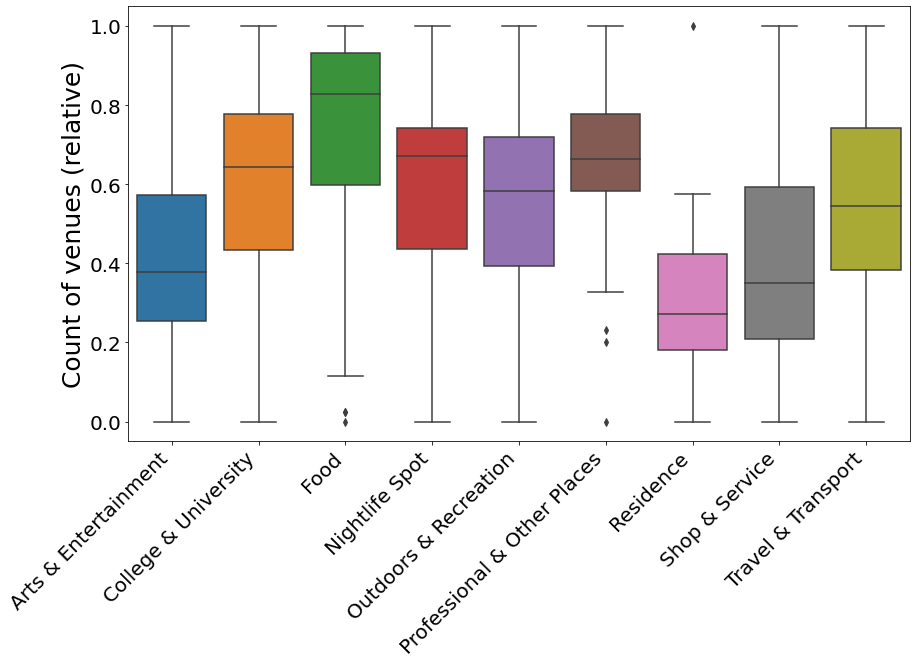

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
ax = sns.boxplot(data = df_scaled)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()


In [54]:
from sklearn.cluster import KMeans

In [57]:
random_state = 0
inertia = []
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=random_state)
    km.fit(df_scaled)
    y_pred = km.predict(df_scaled)
    
    inertia.append((k, km.inertia_))

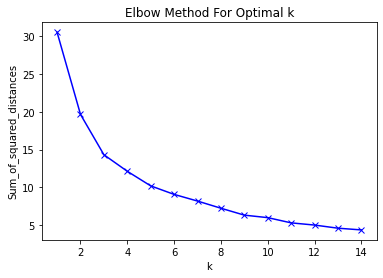

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [59]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_scaled)

kmeans_labels = kmeans.labels_

df_venues_clustered = london_venue_data.copy()
df_venues_clustered['Cluster'] = kmeans_labels

#dataframe to be used for box plot
df_scaled_clustered = df_scaled.copy()
df_scaled_clustered['Cluster'] = kmeans_labels


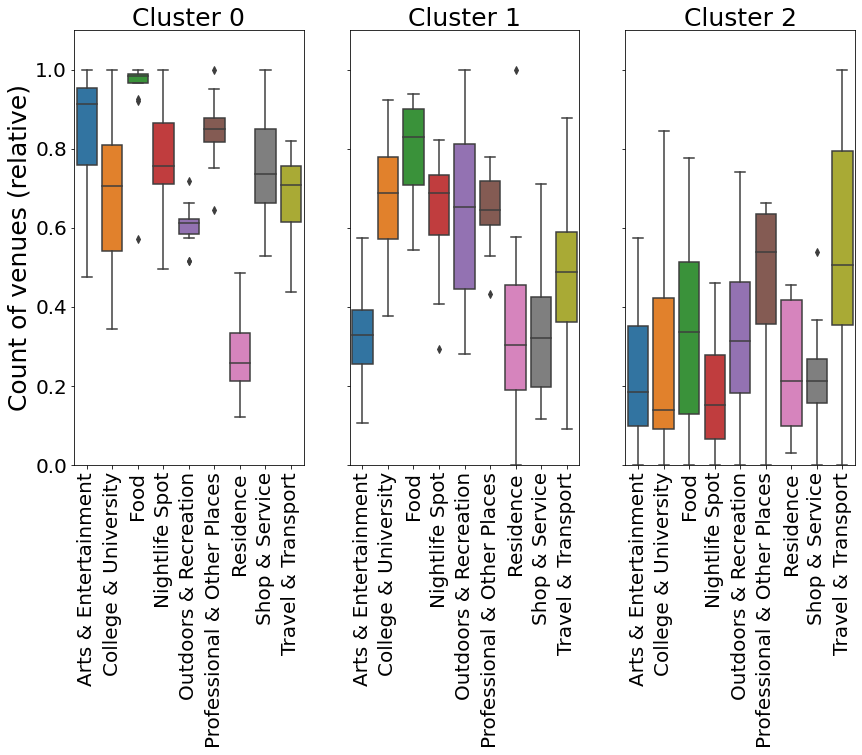

In [162]:
fig,axes= plt.subplots(1,kclusters,figsize=(14,8),sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(0, kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_scaled_clustered[df_scaled_clustered['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [60]:
df_venues_clustered

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810,124,83,247,231,97,113,11,112,90,0
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759,107,95,246,245,99,107,10,112,106,0
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033,84,75,196,159,80,92,13,79,115,1
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389,74,81,77,58,85,86,15,81,140,2
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254,75,88,189,134,76,88,10,77,129,1
5,WC1R,Gray's Inn,Camden,51.519375,-0.117610,83,75,235,206,84,92,3,80,93,1
6,WC1V,High Holborn,"Camden, City of London",51.518660,-0.112102,61,74,220,193,74,102,6,56,96,1
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington",51.522049,-0.113885,50,69,181,148,66,92,7,63,79,1
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London",51.516615,-0.116091,84,69,205,184,79,100,3,71,85,1
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster",51.514800,-0.121158,126,76,244,217,93,117,7,101,121,0


In [67]:
map_london = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>", zoom_start = 15)

#add markers
for i, area, lat, long, cluster in zip(df_venues_clustered.index,
                                         df_venues_clustered['Coverage'],
                                         df_venues_clustered['Latitude'],
                                         df_venues_clustered['Longitude'],
                                         df_venues_clustered['Cluster']):   
    colors = 'blue','gray','green' 
    folium.CircleMarker(
        [lat,long],
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(area + str(cluster), parse_html=True),
        radius=2,
        color=colors[cluster]
    ).add_to(map_london)
    
    
      
map_london

Below are some of other stuff I tried with this data, follow intruction of week 3's lab, we first cluster these district and see if there's any insights

In [88]:
london_venues.groupby('Coverage').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Coverage,,,,,,
"A projection around Parliament Square. Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London (omitting all backstreets nearest to Vauxhall Bridge Road) – derivation: Parliament Square",30,30,30,30,30,30
All but the west of St James's,30,30,30,30,30,30
Bank of England,30,30,30,30,30,30
Barbican,30,30,30,30,30,30
Blackfriars,30,30,30,30,30,30
"Bloomsbury, British Museum, Southampton Row",30,30,30,30,30,30
"Broadgate, Liverpool Street",30,30,30,30,30,30
Cannon Street,30,30,30,30,30,30
Charing Cross,30,30,30,30,30,30


Analyze Each District Neighborhood

In [89]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

london_onehot['Coverage'] = london_venues['Coverage'] 

fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Coverage,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus School,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Donut Shop,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Social Club,Soup Place,South American Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [90]:
london_grouped = london_onehot.groupby('Coverage').mean().reset_index()
london_grouped

,Coverage,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus School,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Donut Shop,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Office,Okonomiyaki Restaurant,Opera House,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Social Club,Soup Place,South American Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,A projection around Parliament Square. Nearby ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [91]:
num_top_venues = 5
for neigh in london_grouped['Coverage']:
    print("----"+neigh+"----")
    temp = london_grouped[london_grouped['Coverage'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----A projection around Parliament Square. Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London (omitting all backstreets nearest to Vauxhall Bridge Road) – derivation: Parliament Square----
                 venue  freq
0              Theater  0.10
1          Coffee Shop  0.10
2  Sporting Goods Shop  0.07
3       Sandwich Place  0.07
4                 Café  0.07


----All but the west of St James's----
        venue  freq
0       Plaza  0.10
1   Bookstore  0.07
2  Art Museum  0.07
3       Hotel  0.07
4        Park  0.07


----Bank of England----
                  venue  freq
0                 Hotel  0.10
1            Boxing Gym  0.07
2             Roof Deck  0.07
3  Gym / Fitness Center  0.07
4            Steakhouse  0.07


----Barbican----
                  venue  freq
0           Coffee Shop  0.07
1            Steakhouse  0.07
2             Roof Deck  0.07
3  Gym / Fitness Center  0.07
4                 Hotel  0.07


----Blackfriars----
         

                  venue  freq
0                 Hotel  0.20
1                Garden  0.10
2           Salad Place  0.07
3           Coffee Shop  0.07
4  Gym / Fitness Center  0.07


----St Pancras, UCL Institute of Education----
         venue  freq
0        Plaza  0.07
1      Exhibit  0.07
2     Wine Bar  0.07
3  Coffee Shop  0.07
4       Bakery  0.07


----St Paul's----
                venue  freq
0         Coffee Shop  0.10
1           Roof Deck  0.07
2  Falafel Restaurant  0.07
3                Park  0.07
4          Steakhouse  0.07


----Surrounds of St James's Park tube station centred on Broadway, Queen Anne's Gate and Old Queen Street to include both sides of part of Victoria Street – derivation: Horse Guards Parade----
                 venue  freq
0                Hotel  0.17
1          Coffee Shop  0.10
2                 Café  0.07
3  Sporting Goods Shop  0.07
4            Hotel Bar  0.07


----Temple----
          venue  freq
0         Hotel  0.13
1   Coffee Shop  0.10
2    

In [92]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
import numpy as np
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Coverage']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Coverage'] = london_grouped['Coverage']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(59, 11)

In [94]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
  verbose=True)

In [95]:
kclusters = 10

london_grouped_clustering = london_grouped.drop('Coverage', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(london_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[5 6 0 3 3 2 0 3 6 1]
59


In [96]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [97]:
neighborhoods_venues_sorted

,Cluster Labels,Coverage,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,A projection around Parliament Square. Nearby ...,Coffee Shop,Theater,Hotel,Café,Sandwich Place,Sporting Goods Shop,Burger Joint,French Restaurant,Chinese Restaurant,Mediterranean Restaurant
1,6,All but the west of St James's,Plaza,Art Museum,Bookstore,Park,Hotel,Art Gallery,Nightclub,Burger Joint,Cocktail Bar,Lounge
2,0,Bank of England,Hotel,Steakhouse,Boxing Gym,Gym / Fitness Center,Roof Deck,Performing Arts Venue,Butcher,Scenic Lookout,Cocktail Bar,Coffee Shop
3,3,Barbican,Hotel,Coffee Shop,Steakhouse,Roof Deck,Gym / Fitness Center,Indie Movie Theater,Concert Hall,Cocktail Bar,Performing Arts Venue,Bookstore
4,3,Blackfriars,Coffee Shop,Art Museum,Seafood Restaurant,Gym / Fitness Center,Grocery Store,Roof Deck,Hotel,Farmers Market,Butcher,Falafel Restaurant
5,2,"Bloomsbury, British Museum, Southampton Row",Coffee Shop,Café,Bookstore,Exhibit,Comic Shop,Cantonese Restaurant,Chocolate Shop,Scandinavian Restaurant,Sandwich Place,Cocktail Bar
6,0,"Broadgate, Liverpool Street",Hotel,Gym / Fitness Center,Steakhouse,Boxing Gym,Event Space,Botanical Garden,Lounge,French Restaurant,Chinese Restaurant,Plaza
7,3,Cannon Street,Coffee Shop,Italian Restaurant,Seafood Restaurant,Hotel,Bistro,Empanada Restaurant,Pub,Restaurant,Farmers Market,Scenic Lookout
8,6,Charing Cross,Bakery,Ice Cream Shop,Art Museum,Garden,Steakhouse,Shopping Plaza,Church,Cocktail Bar,Cosmetics Shop,Dessert Shop
9,1,"Clerkenwell, Farringdon",Coffee Shop,Pub,Hotel,Food Truck,Gym / Fitness Center,Beer Bar,Bakery,Middle Eastern Restaurant,Breakfast Spot,Spanish Restaurant


In [102]:
london_merged = df
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Coverage'), on='Coverage')

london_merged.head() # check the last columns!

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810,2,Bookstore,Café,Exhibit,Coffee Shop,Hotel Bar,Ice Cream Shop,Chocolate Shop,Scandinavian Restaurant,Sandwich Place,Steakhouse
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759,2,Coffee Shop,Café,Bookstore,Exhibit,Comic Shop,Cantonese Restaurant,Chocolate Shop,Scandinavian Restaurant,Sandwich Place,Cocktail Bar
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033,9,Organic Grocery,Bakery,Bookstore,Coffee Shop,French Restaurant,Exhibit,Soup Place,Science Museum,Cocktail Bar,Restaurant
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389,9,Wine Bar,Plaza,Coffee Shop,Exhibit,Bakery,American Restaurant,Mexican Restaurant,Brazilian Restaurant,Malay Restaurant,Burger Joint
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254,9,Coffee Shop,Café,Bookstore,Bakery,Plaza,Pizza Place,Cocktail Bar,Exhibit,Falafel Restaurant,Chinese Restaurant


In [103]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Coverage'],kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
map_clusters

Now, let's explore the food situation in central London

In [104]:
london_Venues_only_restaurant = london_venues[london_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
london_Venues_only_restaurant.index = np.arange(1, len(london_Venues_only_restaurant )+1)

In [105]:
print (london_Venues_only_restaurant['Venue Category'].value_counts())

French Restaurant                  36
Italian Restaurant                 27
Restaurant                         23
Vietnamese Restaurant              19
Japanese Restaurant                15
Indian Restaurant                  13
Falafel Restaurant                 13
Sushi Restaurant                   11
Seafood Restaurant                 11
English Restaurant                  9
Korean Restaurant                   9
Chinese Restaurant                  9
Turkish Restaurant                  8
South American Restaurant           8
Scandinavian Restaurant             8
Asian Restaurant                    7
Modern European Restaurant          7
Cantonese Restaurant                7
Argentinian Restaurant              7
American Restaurant                 7
Tapas Restaurant                    6
Mediterranean Restaurant            6
Middle Eastern Restaurant           5
Ramen Restaurant                    4
Brazilian Restaurant                4
German Restaurant                   3
Portuguese R

In [106]:
print('There are {} unique categories.'.format(len(london_Venues_only_restaurant['Venue Category'].unique())))

There are 45 unique categories.


In [107]:
london_Venues_restaurant = london_Venues_only_restaurant.groupby(['Coverage'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [108]:
london_Venues_restaurant

Coverage
A projection around Parliament Square. Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London (omitting all backstreets nearest to Vauxhall Bridge Road) – derivation: Parliament Square     7
All but the west of St James's                                                                                                                                                                                                   2
Bank of England                                                                                                                                                                                                                  3
Barbican                                                                                                                                                                                                                         2
Blackfriars                                                                        

In [109]:
london_Venues_restaurant_df  = london_Venues_restaurant.to_frame().reset_index()
london_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
london_Venues_restaurant_df.index = np.arange(1, len(london_Venues_restaurant_df)+1)
list_rest_no =london_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =london_Venues_restaurant_df['Neighborhood'].to_list()

In [110]:
# one hot encoding
london_onehot = pd.get_dummies(london_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Coverage'] = london_Venues_only_restaurant['Coverage'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot =london_onehot[fixed_columns]

london_onehot.head()

,Coverage,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,North Indian Restaurant,Okonomiyaki Restaurant,Pakistani Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,New Oxford Street,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,New Oxford Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,"Bloomsbury, British Museum, Southampton Row",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
london_onehot['Japanese Restaurant total'] = london_onehot['Japanese Curry Restaurant'] + london_onehot['Japanese Restaurant'] +london_onehot['Okonomiyaki Restaurant'] +london_onehot['Ramen Restaurant'] + london_onehot['Sushi Restaurant']
london_onehot = london_onehot.drop(['Japanese Curry Restaurant','Japanese Restaurant','Okonomiyaki Restaurant','Ramen Restaurant','Sushi Restaurant'],axis = 1)

In [112]:
london_grouped = london_onehot.groupby('Coverage').mean().reset_index()
london_grouped

,Coverage,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,North Indian Restaurant,Pakistani Restaurant,Portuguese Restaurant,Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Japanese Restaurant total
0,A projection around Parliament Square. Nearby ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.142857,0.0,0.000000,0.000000
1,All but the west of St James's,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.500000
2,Bank of England,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.333333,0.000000
3,Barbican,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.000000
4,Blackfriars,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.000000
5,"Bloomsbury, British Museum, Southampton Row",0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.500000
6,"Broadgate, Liverpool Street",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.166667
7,Cannon Street,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.250000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,Charing Cross,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [113]:
num_top_venues = 10

for hood in london_grouped['Coverage']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Coverage'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----A projection around Parliament Square. Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London (omitting all backstreets nearest to Vauxhall Bridge Road) – derivation: Parliament Square----
                           venue  freq
0       Mediterranean Restaurant  0.14
1             Chinese Restaurant  0.14
2              Korean Restaurant  0.14
3             Italian Restaurant  0.14
4              Indian Restaurant  0.14
5              French Restaurant  0.14
6             Turkish Restaurant  0.14
7  Vegetarian / Vegan Restaurant  0.00
8        North Indian Restaurant  0.00
9           Pakistani Restaurant  0.00


----All but the west of St James's----
                             venue  freq
0        Japanese Restaurant total   0.5
1           Argentinian Restaurant   0.5
2            Vietnamese Restaurant   0.0
3          Scandinavian Restaurant   0.0
4        Middle Eastern Restaurant   0.0
5       Modern European Restaurant   0.0
6  Molecular G

----Northern 'Victoria' around Buckingham Gate (a street) to include both sides of part of Victoria Street----
                             venue  freq
0       Modern European Restaurant   0.2
1                Korean Restaurant   0.2
2                       Restaurant   0.2
3               English Restaurant   0.2
4                Indian Restaurant   0.2
5              Scottish Restaurant   0.0
6  Molecular Gastronomy Restaurant   0.0
7          North Indian Restaurant   0.0
8             Pakistani Restaurant   0.0
9            Portuguese Restaurant   0.0


----Northern head district: Barnsbury (part), Canonbury, Kings Cross, Islington, Pentonville, De Beauvoir Town, Hoxton. Shoreditch (part)----
                             venue  freq
0            Vietnamese Restaurant  0.33
1         Mediterranean Restaurant  0.17
2                Korean Restaurant  0.17
3               Italian Restaurant  0.17
4          Scandinavian Restaurant  0.17
5              Scottish Restaurant  0.00
6  Mole

In [114]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [115]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Coverage']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Coverage'] = london_grouped['Coverage']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Coverage,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A projection around Parliament Square. Nearby ...,Mediterranean Restaurant,Turkish Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Chinese Restaurant,French Restaurant,Fast Food Restaurant,Latin American Restaurant,Greek Restaurant
1,All but the west of St James's,Japanese Restaurant total,Argentinian Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
2,Bank of England,Vietnamese Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Lebanese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
3,Barbican,Falafel Restaurant,Vietnamese Restaurant,Argentinian Restaurant,French Restaurant,Lebanese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
4,Blackfriars,Seafood Restaurant,Falafel Restaurant,Vietnamese Restaurant,Italian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
5,"Bloomsbury, British Museum, Southampton Row",Japanese Restaurant total,Scandinavian Restaurant,Cantonese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
6,"Broadgate, Liverpool Street",Japanese Restaurant total,Chinese Restaurant,German Restaurant,French Restaurant,South American Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Brazilian Restaurant,Austrian Restaurant,Empanada Restaurant
7,Cannon Street,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Restaurant,Asian Restaurant,Empanada Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
8,Charing Cross,Japanese Restaurant total,Indian Restaurant,North Indian Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
9,"Clerkenwell, Farringdon",Japanese Restaurant total,Spanish Restaurant,Middle Eastern Restaurant,Italian Restaurant,English Restaurant,Brazilian Restaurant,Cantonese Restaurant,Austrian Restaurant,Chinese Restaurant,Empanada Restaurant


In [116]:
# set number of clusters (I choose 5)
kclusters = 5

london_grouped_clustering = london_grouped.drop('Coverage', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 2, 0, 0, 1, 2, 4, 1, 4], dtype=int32)

In [117]:
london_merged = df
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [118]:

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Coverage'), on='Coverage')

london_merged

,Postcode district,Coverage,Local Authority Areas,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,WC1A,New Oxford Street,Camden,51.517165,-0.126810,1,Japanese Restaurant total,Scandinavian Restaurant,Cantonese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
1,WC1B,"Bloomsbury, British Museum, Southampton Row",Camden,51.519140,-0.127759,1,Japanese Restaurant total,Scandinavian Restaurant,Cantonese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
2,WC1E,"University College London, SOAS",Camden,51.522520,-0.133033,2,French Restaurant,Japanese Restaurant total,Restaurant,Brazilian Restaurant,American Restaurant,Tapas Restaurant,Taiwanese Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
3,WC1H,"St Pancras, UCL Institute of Education",Camden,51.524755,-0.131389,4,American Restaurant,Brazilian Restaurant,Mexican Restaurant,Italian Restaurant,Malay Restaurant,Turkish Restaurant,Austrian Restaurant,German Restaurant,Latin American Restaurant,Argentinian Restaurant
4,WC1N,"Russell Square, Great Ormond Street",Camden,51.524460,-0.123254,4,Turkish Restaurant,Italian Restaurant,Chinese Restaurant,Falafel Restaurant,Japanese Restaurant total,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant
5,WC1R,Gray's Inn,Camden,51.519375,-0.117610,3,Japanese Restaurant total,Chinese Restaurant,French Restaurant,Restaurant,English Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Brazilian Restaurant,Empanada Restaurant,Austrian Restaurant
6,WC1V,High Holborn,"Camden, City of London",51.518660,-0.112102,3,Restaurant,Japanese Restaurant total,English Restaurant,Italian Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant,Austrian Restaurant
7,WC1X,"Kings Cross, Finsbury (west), Clerkenwell (north)","Camden, Islington",51.522049,-0.113885,2,Vietnamese Restaurant,Middle Eastern Restaurant,French Restaurant,Lebanese Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
8,WC2A,"Lincoln's Inn Fields, Royal Courts of Justice,...","Camden, Westminster, City of London",51.516615,-0.116091,3,Japanese Restaurant total,Restaurant,French Restaurant,English Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
9,WC2B,"Drury Lane, Kingsway, Aldwych","Camden, Westminster",51.514800,-0.121158,3,Japanese Restaurant total,Restaurant,Korean Restaurant,Lebanese Restaurant,Austrian Restaurant,French Restaurant,Latin American Restaurant,Argentinian Restaurant,Italian Restaurant,Indian Restaurant


In [120]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(london_merged['Latitude'], 
                                  london_merged['Longitude'], 
                                  london_merged['Coverage'], 
                                  london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.0).add_to(map_restaurants10)
       
map_restaurants10

Examining each cluster

In [121]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Guildhall,0,Falafel Restaurant,Vietnamese Restaurant,Argentinian Restaurant,French Restaurant,Lebanese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
25,Barbican,0,Falafel Restaurant,Vietnamese Restaurant,Argentinian Restaurant,French Restaurant,Lebanese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
32,St Paul's,0,Falafel Restaurant,Japanese Restaurant total,Seafood Restaurant,Italian Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant,Austrian Restaurant
33,Mansion House,0,Vietnamese Restaurant,Falafel Restaurant,French Restaurant,Seafood Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
35,Blackfriars,0,Seafood Restaurant,Falafel Restaurant,Vietnamese Restaurant,Italian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant


In [122]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New Oxford Street,1,Japanese Restaurant total,Scandinavian Restaurant,Cantonese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
1,"Bloomsbury, British Museum, Southampton Row",1,Japanese Restaurant total,Scandinavian Restaurant,Cantonese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
11,"Leicester Square, St. Giles",1,Japanese Restaurant total,Tapas Restaurant,Indian Restaurant,Cantonese Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Greek Restaurant,German Restaurant
12,Charing Cross,1,Japanese Restaurant total,Indian Restaurant,North Indian Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
18,"Finsbury (east), Moorfields Eye Hospital",1,Japanese Restaurant total,Spanish Restaurant,Vietnamese Restaurant,Asian Restaurant,Austrian Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
26,"St Mary Axe, Aldgate",1,Japanese Restaurant total,Asian Restaurant,French Restaurant,Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
58,All but the west of St James's,1,Japanese Restaurant total,Argentinian Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant
59,North Western head district: Marylebone (part)...,1,Japanese Restaurant total,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Tapas Restaurant,Mexican Restaurant,Fast Food Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant


In [125]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"University College London, SOAS",2,French Restaurant,Japanese Restaurant total,Restaurant,Brazilian Restaurant,American Restaurant,Tapas Restaurant,Taiwanese Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
7,"Kings Cross, Finsbury (west), Clerkenwell (north)",2,Vietnamese Restaurant,Middle Eastern Restaurant,French Restaurant,Lebanese Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
14,St Bartholomew's Hospital,2,Falafel Restaurant,Modern European Restaurant,South American Restaurant,French Restaurant,Japanese Restaurant total,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
17,"Finsbury, Finsbury Estate (west)",2,Japanese Restaurant total,French Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Austrian Restaurant,German Restaurant,Latin American Restaurant,Argentinian Restaurant,Korean Restaurant,Italian Restaurant
21,"Broadgate, Liverpool Street",2,Japanese Restaurant total,Chinese Restaurant,German Restaurant,French Restaurant,South American Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Brazilian Restaurant,Austrian Restaurant,Empanada Restaurant
23,Bank of England,2,Vietnamese Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Lebanese Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
27,"Lloyd's of London, Fenchurch Street",2,Japanese Restaurant total,Turkish Restaurant,Asian Restaurant,South American Restaurant,French Restaurant,Falafel Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
28,"Tower Hill, Tower of London",2,Asian Restaurant,Italian Restaurant,Tapas Restaurant,South American Restaurant,French Restaurant,Japanese Restaurant total,Falafel Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant
30,"Cornhill, Gracechurch Street, Lombard Street",2,French Restaurant,Turkish Restaurant,South American Restaurant,Japanese Restaurant total,Falafel Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
31,Fetter Lane,2,Falafel Restaurant,Argentinian Restaurant,Italian Restaurant,French Restaurant,Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant


In [126]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Gray's Inn,3,Japanese Restaurant total,Chinese Restaurant,French Restaurant,Restaurant,English Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Brazilian Restaurant,Empanada Restaurant,Austrian Restaurant
6,High Holborn,3,Restaurant,Japanese Restaurant total,English Restaurant,Italian Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant,Austrian Restaurant
8,"Lincoln's Inn Fields, Royal Courts of Justice,...",3,Japanese Restaurant total,Restaurant,French Restaurant,English Restaurant,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
9,"Drury Lane, Kingsway, Aldwych",3,Japanese Restaurant total,Restaurant,Korean Restaurant,Lebanese Restaurant,Austrian Restaurant,French Restaurant,Latin American Restaurant,Argentinian Restaurant,Italian Restaurant,Indian Restaurant
10,Covent Garden,3,Restaurant,Japanese Restaurant total,Korean Restaurant,American Restaurant,Thai Restaurant,Latin American Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
13,"Somerset House, Temple (west)",3,Japanese Restaurant total,Restaurant,Korean Restaurant,North Indian Restaurant,American Restaurant,Tapas Restaurant,Taiwanese Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant
22,"Old Broad Street, Tower 42",3,Japanese Restaurant total,Restaurant,Cantonese Restaurant,Chinese Restaurant,South American Restaurant,German Restaurant,French Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant
42,Marylebone,3,Japanese Restaurant total,Restaurant,Argentinian Restaurant,Turkish Restaurant,Italian Restaurant,Modern European Restaurant,Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant
44,"Mayfair (north), Grosvenor Square",3,Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Chinese Restaurant,Japanese Restaurant total,Korean Restaurant,Italian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
47,Marylebone,3,Japanese Restaurant total,Restaurant,Argentinian Restaurant,Turkish Restaurant,Italian Restaurant,Modern European Restaurant,Chinese Restaurant,Greek Restaurant,French Restaurant,Fast Food Restaurant


In [127]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Coverage,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"St Pancras, UCL Institute of Education",4,American Restaurant,Brazilian Restaurant,Mexican Restaurant,Italian Restaurant,Malay Restaurant,Turkish Restaurant,Austrian Restaurant,German Restaurant,Latin American Restaurant,Argentinian Restaurant
4,"Russell Square, Great Ormond Street",4,Turkish Restaurant,Italian Restaurant,Chinese Restaurant,Falafel Restaurant,Japanese Restaurant total,Fast Food Restaurant,Latin American Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant
15,"Clerkenwell, Farringdon",4,Japanese Restaurant total,Spanish Restaurant,Middle Eastern Restaurant,Italian Restaurant,English Restaurant,Brazilian Restaurant,Cantonese Restaurant,Austrian Restaurant,Chinese Restaurant,Empanada Restaurant
16,Hatton Garden,4,Falafel Restaurant,French Restaurant,Middle Eastern Restaurant,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Chinese Restaurant,Empanada Restaurant
19,"St Luke's, Bunhill Fields",4,Vietnamese Restaurant,Japanese Restaurant total,Portuguese Restaurant,Korean Restaurant,Italian Restaurant,Indian Restaurant,Scandinavian Restaurant,Chinese Restaurant,Empanada Restaurant,English Restaurant
20,Shoreditch,4,Vietnamese Restaurant,Italian Restaurant,Korean Restaurant,Indian Restaurant,Portuguese Restaurant,Restaurant,Japanese Restaurant total,Lebanese Restaurant,Greek Restaurant,German Restaurant
29,"Monument, Billingsgate",4,Italian Restaurant,Seafood Restaurant,South American Restaurant,Empanada Restaurant,Restaurant,Japanese Restaurant total,Falafel Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant
34,Cannon Street,4,Italian Restaurant,Seafood Restaurant,Mediterranean Restaurant,Restaurant,Asian Restaurant,Empanada Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant
37,"Portland Place, Regent Street",4,French Restaurant,Japanese Restaurant total,Seafood Restaurant,Austrian Restaurant,Brazilian Restaurant,Greek Restaurant,Italian Restaurant,Modern European Restaurant,Scandinavian Restaurant,American Restaurant
39,"Soho (south east); Chinatown, Soho Square",4,English Restaurant,Italian Restaurant,Tapas Restaurant,Cantonese Restaurant,French Restaurant,Scandinavian Restaurant,Falafel Restaurant,Korean Restaurant,Indian Restaurant,Greek Restaurant
